# IF702 - Redes Neurais

#### Equipe
* Bruno César - bcgs
* Franclin Cabral - fcmo
* Ítalo Rodrigo Barbosa Paulino - irbp
* José Nilton de Oliveira Lima Júnior - jnolj

Este notebook contém os scripts executados em cada passo do projeto da disciplina de Redes Neurais.

In [0]:
!wget http://cin.ufpe.br/~gcv/web_lci/TRN

--2018-11-21 15:56:57--  http://cin.ufpe.br/~gcv/web_lci/TRN
Resolving cin.ufpe.br (cin.ufpe.br)... 150.161.2.9
Connecting to cin.ufpe.br (cin.ufpe.br)|150.161.2.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766723352 (731M) [application/vnd.rim.cod]
Saving to: ‘TRN’

TRN                  33%[=====>              ] 245.10M  12.5MB/s    eta 41s    ^C


## Leitura e limpeza dos dados
A leitura dos dados é feita utilizando a biblioteca pandas. Os trechos de código que seguem abaixo fazem a leitura do dataset de crédito "TRN" e a remoção de features que não nos interessam, mas estão presentes no dataset.

In [0]:
DATASET_PATH = "/content/gdrive/My Drive/Projeto/dataset/"
MODELS_PATH = "/content/gdrive/My Drive/Projeto/mlp_models/"

In [3]:
"""Only for google colab"""
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pip3 install git+https://github.com/irbp/neuro-evolution.git
!pip3 install -U imbalanced-learn

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
  Cloning https://github.com/irbp/neuro-evolution.git to /tmp/pip-req-build-8dwx2itt
  Running setup.py bdist_wheel for neuro-evolution ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-ko_l6urg/wheels/8c/4d/ee/df62a991bcd07cf7b03828263158b53fa8d14c760b24834f62
  Running setup.py bdist_wheel for logger ... - done
  Stored in directory: /root/.cache/pip/wheels/91/d4/96/08341e2ac92c1ed4b760e4848e1acda3795f0257a83b94b42e
Successfully built neuro-e

In [0]:
"""Only for google colab"""
!wget http://cin.ufpe.br/~gcv/web_lci/TRN

--2018-12-03 13:45:18--  http://cin.ufpe.br/~gcv/web_lci/TRN
Resolving cin.ufpe.br (cin.ufpe.br)... 150.161.2.9
Connecting to cin.ufpe.br (cin.ufpe.br)|150.161.2.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766723352 (731M) [application/vnd.rim.cod]
Saving to: ‘TRN’

TRN                 100%[===================>] 731.20M  6.41MB/s    in 84s     

2018-12-03 13:46:42 (8.74 MB/s) - ‘TRN’ saved [766723352/766723352]



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

In [0]:
df = pd.read_table("TRN")
df.head()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0


## Divisão dos dados em treino, teste e validação

In [0]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, -2].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1/4,
                                                    random_state=42,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=1/3,
                                                  random_state=42,
                                                  stratify=y_train)

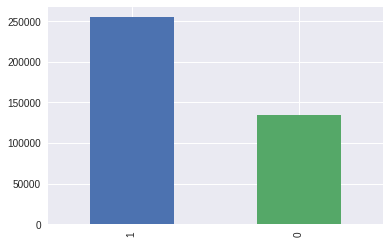

In [0]:
df["IND_BOM_1_1"].value_counts().plot.bar()

## Sampling dos dados e normalização

Como podemos ver no gráfico plotado acima, há um desbalanceamento entre as duas classes presentes no dataset. Para resolver este problema vamos utilizar uma técnica de oversampling bem simples que consiste em escolher algumas instâncias aleatórias da classe minoritária e replicá-las algumas vezes. Mas antes disso vamos normalizar a nossa base de dados. É interessante fazer a normalização antes do under/oversampling dos dados pois técnicas como o SMOTE fazem uso de algoritmos como o k-NN para gerar os samples, e estes obtém um melhor desempenho com dados normalizados.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Agora vamos aplicar a técnica de oversampling nos conjuntos de treino, teste e validação, assim como verificar se a proporção está de 1/2 para cada classe dos conjuntos.

In [0]:
ros = RandomOverSampler(random_state=42)

# Oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
X_val, y_val = ros.fit_resample(X_val, y_val)

print("***Train***")
print(pd.value_counts(pd.Series(y_train), normalize=True))
print()
print("***Test***")
print(pd.value_counts(pd.Series(y_test), normalize=True))
print()
print("***Validation***")
print(pd.value_counts(pd.Series(y_val), normalize=True))

***Train***
1    0.5
0    0.5
dtype: float64

***Test***
1    0.5
0    0.5
dtype: float64

***Validation***
1    0.5
0    0.5
dtype: float64


## Seleção de features
Como o dataset apresenta bastante features se torna importante fazer uma análise de quais delas são realmente relevantes para representar o nosso problema. Features irrelevantes além tornar o tempo de treinamento maior também podem diminuir a acurácia do nosso modelo. Sendo assim, nos trechos abaixo vamos fazer uma análise de quais features são mais relevantes para representar o nosso problema.

In [0]:
from sklearn.decomposition import PCA

# Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)

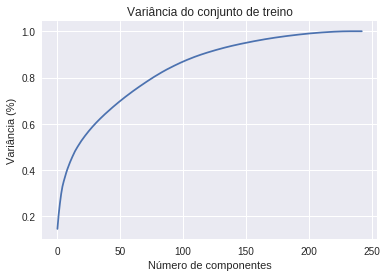

In [0]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância (%)')
plt.title('Variância do conjunto de treino')
plt.show()

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.arange(X_train.shape[1])[cumsum >= 0.9][0] + 1

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

np.save(DATASET_PATH + "X_train.npy", X_train)
np.save(DATASET_PATH + "y_train.npy", y_train)
np.save(DATASET_PATH + "X_test.npy", X_test)
np.save(DATASET_PATH + "y_test.npy", y_test)
np.save(DATASET_PATH + "X_val.npy", X_val)
np.save(DATASET_PATH + "y_val.npy", y_val)

## Definição dos parâmetros da MLP

Pensando em obter os melhores parâmetros possíveis e ao mesmo tempo visando o desempenho, nós optamos por utilizar algoritmo genético, pois este apresenta resultado mais rápido do que o grid search. Ao invés de testar todas as possíveis combinações de hiperparâmetros, o algoritmo genético irá selecionar os melhores indivíduos onde cada indivíduo representa uma combinação de hiperparâmetros. A métrica de avaliação do indivíduo é a acurácia do conjunto de validação, ou seja, para cada indivíduo uma rede neural é criada e treinada utilizando os parâmetros que este indíviduo está codificando. Após treinada ela é avaliada e o resultado dessa avaliação é utilizado para saber quais indivíduos irão representar aquela geração e assim criar indivíduos ainda melhores.

Para isso nós estamos fazendo uso da bilioteca neuro-evolution (https://github.com/irbp/neuro-evolution), pois ela já apresenta tudo o que é necessário para realizarmos o que foi descrito acima.

In [0]:
def load_data():
    X_train = np.load(DATASET_PATH + "X_train.npy")
    y_train = np.load(DATASET_PATH + "y_train.npy")
    X_val = np.load(DATASET_PATH + "X_val.npy")
    y_val = np.load(DATASET_PATH + "y_val.npy")
    X_test = np.load(DATASET_PATH + "X_test.npy")
    y_test = np.load(DATASET_PATH + "y_test.npy")
    
    train_perm = np.random.permutation(X_train.shape[0])
    X_train, y_train = X_train[train_perm], y_train[train_perm]
    val_perm = np.random.permutation(X_val.shape[0])
    X_val, y_val = X_val[val_perm], y_val[val_perm]
    test_perm = np.random.permutation(X_test.shape[0])
    X_test, y_test = X_test[test_perm], y_test[test_perm]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [0]:
# from neuro_evolution.evolution import NeuroEvolution

params = {
    "batch_size": [1024],
    "n_layers": [1, 2, 3],
    "n_neurons": [256, 512, 1024],
    "dropout": [0.1, 0.25, 0.5],
    "optimizers": ["rmsprop", "adam"],
    "activations": ["relu", "sigmoid", "tanh"],
    "last_layer_activations": ["sigmoid"],
    "losses": ["binary_crossentropy"],
    "metrics": ["accuracy"],
    "verbose": [0]
}
# search = NeuroEvolution(generations=10, population=10, params=params)
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [0]:
search.evolve(X_train, y_train, X_val, y_val, X_test, y_test)

  0%|          | 0/10 [00:00<?, ?it/s]

False


 10%|█         | 1/10 [00:22<03:26, 22.91s/it]

------ Accuracy: 0.6302098033307588
False


 20%|██        | 2/10 [00:41<02:53, 21.71s/it]

------ Accuracy: 0.6206447767692462
False


 30%|███       | 3/10 [01:26<03:19, 28.52s/it]

------ Accuracy: 0.6172970174905681
False


 40%|████      | 4/10 [02:04<03:08, 31.46s/it]

------ Accuracy: 0.6386928842568452
False


 50%|█████     | 5/10 [02:30<02:28, 29.72s/it]

------ Accuracy: 0.6229576316853176
False


 60%|██████    | 6/10 [02:56<01:54, 28.63s/it]

------ Accuracy: 0.6360899425649791
False


 70%|███████   | 7/10 [03:42<01:41, 33.82s/it]

------ Accuracy: 0.5930159625077093
False


 80%|████████  | 8/10 [04:20<01:10, 35.03s/it]

------ Accuracy: 0.6272305328171479
False


 90%|█████████ | 9/10 [04:46<00:32, 32.42s/it]

------ Accuracy: 0.6191943425781083
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6371248472378807
False


 10%|█         | 1/10 [00:49<07:26, 49.57s/it]

------ Accuracy: 0.6370229247234187
False


 20%|██        | 2/10 [01:28<06:11, 46.50s/it]

------ Accuracy: 0.6391789758254388
False


 30%|███       | 3/10 [02:01<04:55, 42.22s/it]

------ Accuracy: 0.6301941230566485
False


 40%|████      | 4/10 [02:29<03:49, 38.18s/it]

------ Accuracy: 0.623506444587747
False


 50%|█████     | 5/10 [03:07<03:10, 38.11s/it]

------ Accuracy: 0.6201351648137872
False


 60%|██████    | 6/10 [03:51<02:38, 39.70s/it]

------ Accuracy: 0.5910794366395615
False


 70%|███████   | 7/10 [04:24<01:53, 37.73s/it]

------ Accuracy: 0.6251215229842088
False


 80%|████████  | 8/10 [04:56<01:12, 36.03s/it]

------ Accuracy: 0.6297707529695611
False


 90%|█████████ | 9/10 [05:21<00:32, 32.88s/it]

------ Accuracy: 0.6348747138425698
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6170696521495485
False


 10%|█         | 1/10 [00:31<04:42, 31.38s/it]

------ Accuracy: 0.6403863644706088
False


 20%|██        | 2/10 [01:06<04:20, 32.60s/it]

------ Accuracy: 0.6364035501538273
False


 30%|███       | 3/10 [01:32<03:34, 30.59s/it]

------ Accuracy: 0.6340201336023713
False


 40%|████      | 4/10 [02:01<03:00, 30.11s/it]

------ Accuracy: 0.6321149686039547
False


 50%|█████     | 5/10 [02:29<02:26, 29.39s/it]

------ Accuracy: 0.635431366977386
False


 60%|██████    | 6/10 [02:54<01:52, 28.10s/it]

------ Accuracy: 0.6293552230830833
False


 70%|███████   | 7/10 [03:42<01:41, 33.93s/it]

------ Accuracy: 0.6384341580330097
False


 80%|████████  | 8/10 [04:19<01:09, 34.85s/it]

------ Accuracy: 0.6364584312907922
False


 90%|█████████ | 9/10 [04:41<00:31, 31.02s/it]

------ Accuracy: 0.6354313669661705
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6332282748548945
False


 10%|█         | 1/10 [00:33<05:00, 33.44s/it]

------ Accuracy: 0.6384733590042804
False


 20%|██        | 2/10 [01:30<05:24, 40.54s/it]

------ Accuracy: 0.6368347603611466
False


 30%|███       | 3/10 [02:21<05:06, 43.74s/it]

------ Accuracy: 0.6343023803401809
False


 40%|████      | 4/10 [02:59<04:11, 41.87s/it]

------ Accuracy: 0.6373992535189941
False


 50%|█████     | 5/10 [03:49<03:41, 44.32s/it]

------ Accuracy: 0.6381283909475889
False


 60%|██████    | 6/10 [04:24<02:45, 41.44s/it]

------ Accuracy: 0.6396180262184137
False


 70%|███████   | 7/10 [05:13<02:11, 43.77s/it]

------ Accuracy: 0.6380421487390144
False


 80%|████████  | 8/10 [05:54<01:26, 43.01s/it]

------ Accuracy: 0.6381989526726974
False


 90%|█████████ | 9/10 [06:40<00:43, 43.93s/it]

------ Accuracy: 0.6351491203947238
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6381127106304858
False


 10%|█         | 1/10 [00:26<03:56, 26.26s/it]

------ Accuracy: 0.6386693636456703
False


 20%|██        | 2/10 [01:10<04:12, 31.59s/it]

------ Accuracy: 0.635713613649772
False


 30%|███       | 3/10 [01:48<03:55, 33.69s/it]

------ Accuracy: 0.6391789756665529
False


 40%|████      | 4/10 [02:42<03:57, 39.57s/it]

------ Accuracy: 0.6384733589538107
False


 50%|█████     | 5/10 [03:17<03:12, 38.43s/it]

------ Accuracy: 0.6368190799935739
False


 60%|██████    | 6/10 [03:49<02:25, 36.42s/it]

------ Accuracy: 0.6403863643621925
False


 70%|███████   | 7/10 [04:43<02:04, 41.55s/it]

------ Accuracy: 0.6359174586394419
False


 80%|████████  | 8/10 [05:16<01:18, 39.16s/it]

------ Accuracy: 0.6340671747125664
False


 90%|█████████ | 9/10 [05:53<00:38, 38.51s/it]

------ Accuracy: 0.639845391609903
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6359096183995782
False


 10%|█         | 1/10 [00:42<06:18, 42.10s/it]

------ Accuracy: 0.6390613729789197
False


 20%|██        | 2/10 [01:13<05:10, 38.87s/it]

------ Accuracy: 0.6375952583155313
False


 30%|███       | 3/10 [01:48<04:25, 37.87s/it]

------ Accuracy: 0.6399394738882398
False


 40%|████      | 4/10 [02:23<03:40, 36.79s/it]

------ Accuracy: 0.6354078465755666
False


 50%|█████     | 5/10 [03:01<03:06, 37.24s/it]

------ Accuracy: 0.6383949573103488
False


 60%|██████    | 6/10 [03:43<02:34, 38.66s/it]

------ Accuracy: 0.6396807477036585
False


 70%|███████   | 7/10 [04:36<02:09, 43.03s/it]

------ Accuracy: 0.6349295951384205
False


 80%|████████  | 8/10 [05:40<01:38, 49.20s/it]

------ Accuracy: 0.6406764511267719
False


 90%|█████████ | 9/10 [06:13<00:44, 44.49s/it]

------ Accuracy: 0.6390535326960634
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6395004234915264
False


 10%|█         | 1/10 [01:04<09:44, 64.92s/it]

------ Accuracy: 0.6414369491895727
False


 20%|██        | 2/10 [01:39<07:26, 55.77s/it]

------ Accuracy: 0.6405902091350298
False


 30%|███       | 3/10 [02:12<05:43, 49.06s/it]

------ Accuracy: 0.6405039670460871
False


 40%|████      | 4/10 [02:57<04:47, 47.86s/it]

------ Accuracy: 0.6383714366991738
False


 50%|█████     | 5/10 [04:02<04:24, 52.99s/it]

------ Accuracy: 0.6397042683223104
False


 60%|██████    | 6/10 [05:20<04:01, 60.39s/it]

------ Accuracy: 0.6395396243076497
False


 70%|███████   | 7/10 [05:50<02:33, 51.16s/it]

------ Accuracy: 0.6404255651820542
False


 80%|████████  | 8/10 [06:40<01:41, 50.92s/it]

------ Accuracy: 0.6386301626631842
False


 90%|█████████ | 9/10 [07:35<00:52, 52.11s/it]

------ Accuracy: 0.6394612225595099
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6343572616977167
False


 10%|█         | 1/10 [00:23<03:33, 23.73s/it]

------ Accuracy: 0.6344356634421179
False


 20%|██        | 2/10 [00:56<03:32, 26.59s/it]

------ Accuracy: 0.6407156520513113
False


 30%|███       | 3/10 [01:33<03:26, 29.57s/it]

------ Accuracy: 0.6384419982653965
False


 40%|████      | 4/10 [02:27<03:41, 36.96s/it]

------ Accuracy: 0.6362467463902458
False


 50%|█████     | 5/10 [03:11<03:15, 39.04s/it]

------ Accuracy: 0.6392730580495675
False


 60%|██████    | 6/10 [03:42<02:26, 36.56s/it]

------ Accuracy: 0.6395317840173163
False


 70%|███████   | 7/10 [04:30<02:00, 40.02s/it]

------ Accuracy: 0.6397277888830156
False


 80%|████████  | 8/10 [05:11<01:20, 40.33s/it]

------ Accuracy: 0.6391319345488808
False


 90%|█████████ | 9/10 [05:56<00:41, 41.85s/it]

------ Accuracy: 0.6380107880506002
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6394298617084713
False


 10%|█         | 1/10 [00:47<07:09, 47.69s/it]

------ Accuracy: 0.6407626932157146
False


 20%|██        | 2/10 [01:35<06:21, 47.75s/it]

------ Accuracy: 0.6401746794504307
False


 30%|███       | 3/10 [02:23<05:35, 47.91s/it]

------ Accuracy: 0.640002195369746
False


 40%|████      | 4/10 [03:04<04:34, 45.73s/it]

------ Accuracy: 0.6398375514242474
False


 50%|█████     | 5/10 [03:53<03:53, 46.66s/it]

------ Accuracy: 0.6385125599325584
False


 60%|██████    | 6/10 [04:24<02:48, 42.15s/it]

------ Accuracy: 0.6409900585529956
False


 70%|███████   | 7/10 [04:59<01:59, 39.88s/it]

------ Accuracy: 0.6407313325889854
False


 80%|████████  | 8/10 [05:52<01:27, 43.69s/it]

------ Accuracy: 0.6370856463058642
False


 90%|█████████ | 9/10 [06:35<00:43, 43.69s/it]

------ Accuracy: 0.6402217204671635
False


100%|██████████| 10/10 [07:11<00:00, 41.38s/it]

------ Accuracy: 0.640449085897907
[03/Dec/2018 15:01:12] INFO - best accuracy: 0.6409900585529956, best params: {'batch_size': 1024, 'n_layers': 3, 'n_neurons': 512, 'dropout': 0.5, 'optimizers': 'adam', 'activations': 'relu', 'last_layer_activations': 'sigmoid', 'losses': 'binary_crossentropy', 'metrics': 'accuracy', 'verbose': 0}


## Treino da MLP

Logo abaixo a arquitetura da nossa rede será definida utilizando os parâmetros escolhidos pelo algoritmo genético executado acima. Após definida a arquitetura, a rede será treinada utilizando o conjunto de treino e para ao early stopping será utilizado o conjunto de validação. Logo após o conjunto de teste será avaliado utilizando as métricas exigidas pelo projeto.

In [18]:
!pip3 install scikit-plot

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt

In [0]:
def create_model(input_dim, output_dim, params):
    n_layers = params["n_layers"]
    n_neurons = params["n_neurons"]
    dropout = params["dropout"]
    optimizer = params["optimizer"]
    activation = params["activation"]
    last_layer_activation = params["last_layer_activation"]
    loss = params["loss"]
    metrics = params["metrics"]
    
    model = Sequential()
    # Hidden layers
    for n in range(n_layers):
        if n == 0:
            model.add(Dense(n_neurons[n], activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(n_neurons[n], activation=activation))
        if dropout != 0.0:
            model.add(Dropout(dropout))
    # Output layer
    model.add(Dense(output_dim, activation=last_layer_activation))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    return model

In [0]:
params = {
    "n_layers": 2,
    "n_neurons": [256, 256],
    "dropout": 0.25,
    "optimizer": "adam",
    "activation": "sigmoid",
    "last_layer_activation": "sigmoid",
    "loss": "binary_crossentropy",
    "metrics": ["accuracy"],
}
model = create_model(X_train.shape[1], 1, params)

In [34]:
history = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=10000,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(patience=5)])

Train on 255098 samples, validate on 127550 samples
Epoch 1/10000
255098/255098 [==============================] - 3s 10us/step - loss: 0.6639 - acc: 0.6007 - val_loss: 0.6453 - val_acc: 0.6271
Epoch 2/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6479 - acc: 0.6228 - val_loss: 0.6431 - val_acc: 0.6290
Epoch 3/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6443 - acc: 0.6258 - val_loss: 0.6422 - val_acc: 0.6302
Epoch 4/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6426 - acc: 0.6278 - val_loss: 0.6417 - val_acc: 0.6311
Epoch 5/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6414 - acc: 0.6294 - val_loss: 0.6411 - val_acc: 0.6308
Epoch 6/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6398 - acc: 0.6311 - val_loss: 0.6385 - val_acc: 0.6341
Epoch 7/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6373 - acc: 0.63

## Predições no conjunto de teste

In [0]:
def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

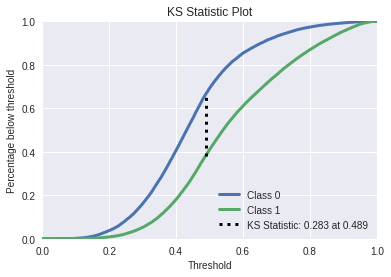


Accuracy:         0.6412
Recall:           0.5896
Precision:        0.6574
F1:               0.6217
AUROC:            0.6939
AUPR:             0.6923


In [36]:
# Fazer predições no conjunto de teste
y_pred_scores = model.predict(X_test)
y_pred_class = model.predict_classes(X_test, verbose=0)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Ensemble de MLP's
Nosso próximo passo será criar um ensemble de MLP's para avaliarmos, para isso utilizaremos o método bagging. Várias redes serão treinadas de forma independentes utilizando subconjuntos do conjunto original de treino,  onde esse subconjuntos podem se sobrepôr. Além disso, cada subconjunto contém suas próprias features, ou seja, cada rede é treinada utilizando um conjuno de features definido de forma aleatória. Isso permite que cada rede consiga se "especializar" em características diferentes do dataset. No momento de avaliação cada rede neural é submetida ao conjunto de teste e suas predições são obtidas para compor a predição final do ensemble, onde esta predição final é definida pela maioria dos votos das redes.

In [0]:
def create_emsemble(n_models, instances_ratio, features_ratio, params):
    models = []
    features_idx = []
    for i in range(n_models):
        features = np.random.choice(range(X_train.shape[1]),
                                    round(X_train.shape[1] * features_ratio))
        
        _, xi_train, _, yi_train = train_test_split(X_train,
                                                    y_train,
                                                    test_size=instances_ratio,
                                                    random_state=42,
                                                    stratify=y_train)
        
        xi_train = xi_train[:, features]
        xi_val = X_val[:, features]
    
        model = create_model(xi_train.shape[1], 1, params)
        print()
        print("-----------------Training MLP {}-----------------".format(i))
        print()
        model.fit(xi_train, yi_train,
                  batch_size=1024,
                  epochs=10000,
                  validation_data=(xi_val, y_val),
                  callbacks=[EarlyStopping(patience=5)],
                  verbose=1)
        model.save_weights(MODELS_PATH + "model-{}.hdf5".format(i), overwrite=True)
        
        models.append(model)
        features_idx.append(features)
        
        # Avoiding memory issues
        K.clear_session()
        
    np.save(MODELS_PATH + "features.npy", np.array(features_idx))
        
    return models, features_idx

In [0]:
def evaluate_model(features_idx, params):
    predictions = []
    for i, f in enumerate(features_idx):
        xi_test = X_test[:, f]
        model = create_model(xi_test.shape[1], 1, params)
        model.load_weights(MODELS_PATH + "model-{}.hdf5".format(i))
        pred = model.predict(xi_test, batch_size=1024, verbose=1)
        predictions.append(pred)
        
        K.clear_session()
    
    pred_mean = np.round(np.array(predictions)[:,:,0].mean(axis=0))
    pred_mean_score = np.array(predictions)[:,:,0].mean(axis=0)
    pred_mean_score_0 = 1 - pred_mean_score
    pred_mean_score = np.column_stack([pred_mean_score_0, pred_mean_score])
    
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, pred_mean, pred_mean_score)
    
    print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

    #accuracy = pred_mean[pred_mean == y_test].shape[0] / X_test.shape[0]
    
    #print("Accuray: {}".format(accuracy))

In [14]:
models, features = create_emsemble(20, 0.8, 0.5, params)


-----------------Training MLP 0-----------------

Train on 204079 samples, validate on 127550 samples
Epoch 1/10000
204079/204079 [==============================] - 4s 21us/step - loss: 0.6950 - acc: 0.5393 - val_loss: 0.6806 - val_acc: 0.5671
Epoch 2/10000
204079/204079 [==============================] - 2s 9us/step - loss: 0.6817 - acc: 0.5634 - val_loss: 0.6808 - val_acc: 0.5657
Epoch 3/10000
204079/204079 [==============================] - 2s 9us/step - loss: 0.6797 - acc: 0.5671 - val_loss: 0.6787 - val_acc: 0.5698
Epoch 4/10000
204079/204079 [==============================] - 2s 10us/step - loss: 0.6783 - acc: 0.5714 - val_loss: 0.6777 - val_acc: 0.5717
Epoch 5/10000
204079/204079 [==============================] - 2s 10us/step - loss: 0.6774 - acc: 0.5721 - val_loss: 0.6775 - val_acc: 0.5716
Epoch 6/10000
204079/204079 [==============================] - 2s 10us/step - loss: 0.6763 - acc: 0.5744 - val_loss: 0.6758 - val_acc: 0.5753
Epoch 7/10000
204079/204079 [==================

127548/127548 [==============================] - 0s 2us/step


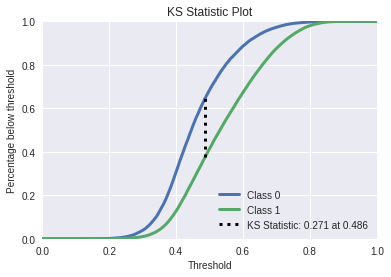


Accuracy:         0.6352
Recall:           0.5851
Precision:        0.6502
F1:               0.6160
AUROC:            0.6868
AUPR:             0.6848


In [38]:
evaluate_model(features, params)